<h2 style="font-size:35px; background-color:orange; text-align:center; color:blue">TPS April'21 </h2>

**The notebook consists of the following:-**
1. Importing libraries
2. Understanding Data
3. Visualising Missing Data
4. Exploratory Data Analysis
   - Univariate Analysis
   - Bivariate Analysis
7. Data preprocessing
8. Modeling and Prediction

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Importing libraries</h2>

In [ ]:
# Data manipulation libraries
import numpy as np
import pandas as pd
import missingno as msno

# Visualization libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/test.csv')
sample_submission = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv')

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Understanding Data</h2>

In [ ]:
print(train.shape)
train.head()

(100000, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [ ]:
print(test.shape)
test.head()

(100000, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96513 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       94819 non-null   object 
 8   Fare         99867 non-null   float64
 9   Cabin        29169 non-null   object 
 10  Embarked     99723 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


It seems that there are missing values in both train and test data.

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Visualising Missing Data</h2>

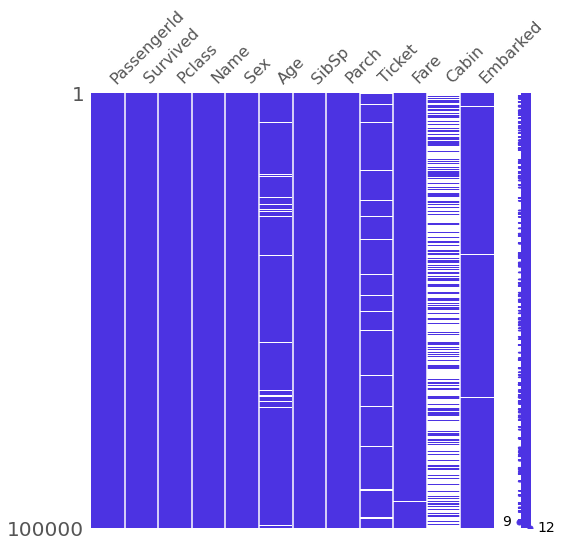

In [ ]:
msno.matrix(train, color = (.30, .20, .89), figsize=(8,8))
plt.show()

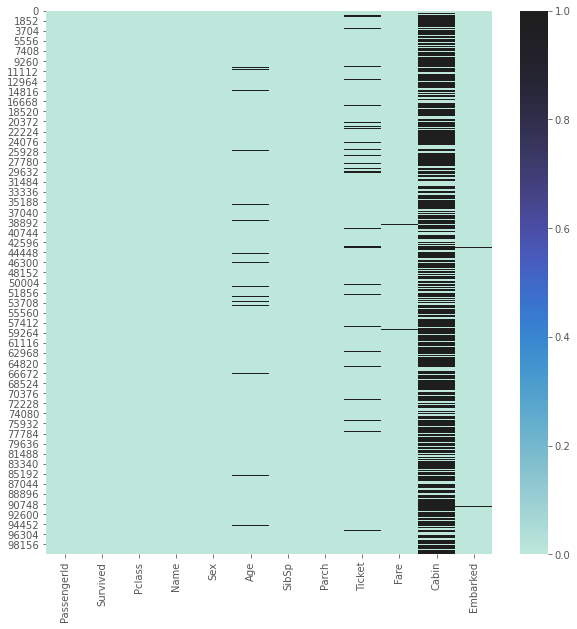

In [ ]:
# One more way to visualize using seaborn heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), center=1)
plt.show()

In [ ]:
# missing data in train data
missing_percentages = (train[train.columns].isnull().sum() / train.shape[0]) * 100
missing_percentages

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

In [ ]:
# missing data in test data
missing_percentages_test = (test[test.columns].isnull().sum() / test.shape[0]) * 100
missing_percentages_test

PassengerId     0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.487
SibSp           0.000
Parch           0.000
Ticket          5.181
Fare            0.133
Cabin          70.831
Embarked        0.277
dtype: float64

In [ ]:
# total missing data counts in train and test data
missing_values_count = train.isnull().sum()
missing_values_count_test = test.isnull().sum()

# find the percentage of missing data in training data
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells)*100
print("The percentage of total missing data from the training dataset is :", percent_missing, "%")

# find the percentage of missing data in testing data
total_cells_test = np.product(test.shape)
total_missing_test = missing_values_count_test.sum()
percent_missing_test = (total_missing_test / total_cells_test)*100
print("The percentage of total missing data from the testing dataset is :", percent_missing_test, "%")

The percentage of total missing data from the training dataset is : 6.347083333333334 %
The percentage of total missing data from the testing dataset is : 7.264454545454544 %


*The columns with missing values are*
- Age
- Ticket
- Fare
- Cabin
- Embarked

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,100000.0,49999.500000,28867.657797,0.00,24999.75,49999.50,74999.25,99999.00
Survived,100000.0,0.427740,0.494753,0.00,0.00,0.00,1.00,1.00
Pclass,100000.0,2.106910,0.837727,1.00,1.00,2.00,3.00,3.00
Age,96708.0,38.355472,18.313556,0.08,25.00,39.00,53.00,87.00
SibSp,100000.0,0.397690,0.862566,0.00,0.00,0.00,1.00,8.00
Parch,100000.0,0.454560,0.950076,0.00,0.00,0.00,1.00,9.00
Fare,99866.0,43.929330,69.588820,0.68,10.04,24.46,33.50,744.66


<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Exploratory Data Analysis</h2>

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [ ]:
for i in train.columns:
    print("The number of unique values in {} is {}".format(i, len(train[i].unique())))

The number of unique values in PassengerId is 100000
The number of unique values in Survived is 2
The number of unique values in Pclass is 3
The number of unique values in Name is 92144
The number of unique values in Sex is 2
The number of unique values in Age is 174
The number of unique values in SibSp is 7
The number of unique values in Parch is 8
The number of unique values in Ticket is 75332
The number of unique values in Fare is 15936
The number of unique values in Cabin is 26993
The number of unique values in Embarked is 4


*The categorical features are*
- Pclass
- Sex
- Embarked
- Parch
- SibSp

*The continuous features are*
- Age
- Fare

*The ones which will be dealt manually are*
- Ticket
- Cabin
- Name

In [ ]:
categorical_features = ["Pclass","Sex","Embarked","Parch","SibSp"]
continuous_features = ["Age","Fare"]

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Univariate Analysis</h2>

> Understanding the target variable - Survived

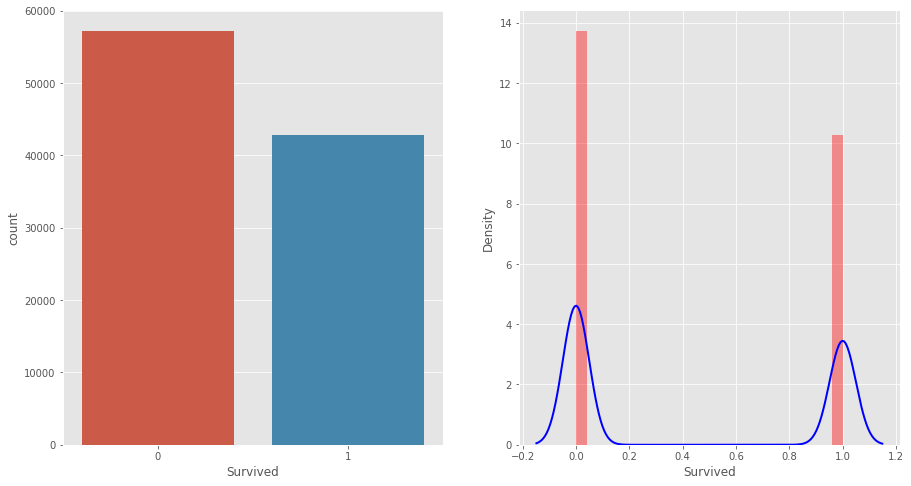

In [ ]:
# Checking the count & distribution of Survived
fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax = sns.countplot(x="Survived",data=train)
plt.subplot(1,2,2)
sns.distplot(train.loc[: ,'Survived'], hist_kws={"color":"r"}, kde_kws={"color":"b", "lw":2})
plt.show()

In [ ]:
print("The percentage of people who didn't survive :",((train['Survived'] == 0).sum() / train.shape[0]) * 100)
print("The percentage of people who did survive :",((train['Survived'] == 1).sum() / train.shape[0]) * 100)

The percentage of people who didn't survive : 57.226
The percentage of people who did survive : 42.774


> Understanding the features

**Pclass**

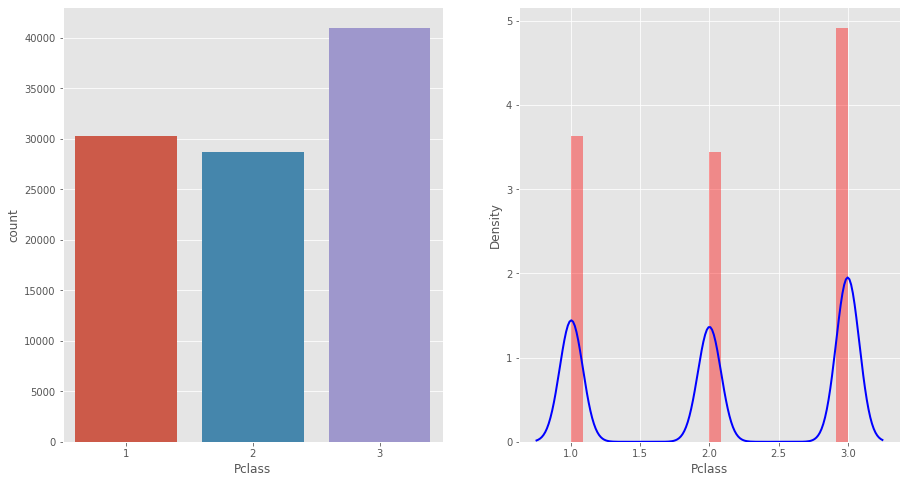

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax = sns.countplot(x="Pclass",data=train)
plt.subplot(1,2,2)
sns.distplot(train.loc[: ,"Pclass"], hist_kws={"color":"r"}, kde_kws={"color":"b", "lw":2})
plt.show()

In [ ]:
print("The percentage of people in class 1 :",((train['Pclass'] == 1).sum() / train.shape[0]) * 100)
print("The percentage of people in class 2 :",((train['Pclass'] == 2).sum() / train.shape[0]) * 100)
print("The percentage of people in class 3 :",((train['Pclass'] == 3).sum() / train.shape[0]) * 100)

The percentage of people in class 1 : 30.314999999999998
The percentage of people in class 2 : 28.679
The percentage of people in class 3 : 41.006


**Parch**

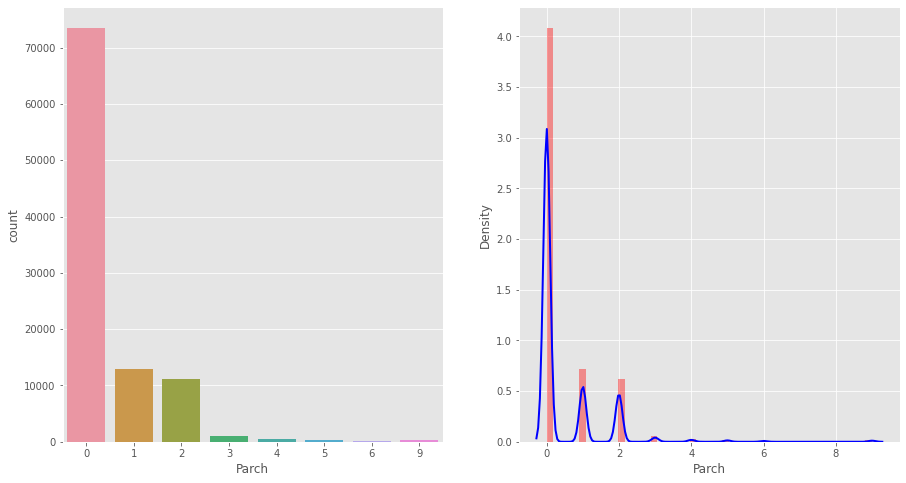

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax = sns.countplot(x="Parch",data=train)
plt.subplot(1,2,2)
sns.distplot(train.loc[: ,"Parch"], hist_kws={"color":"r"}, kde_kws={"color":"b", "lw":2})
plt.show()

**SibSp**

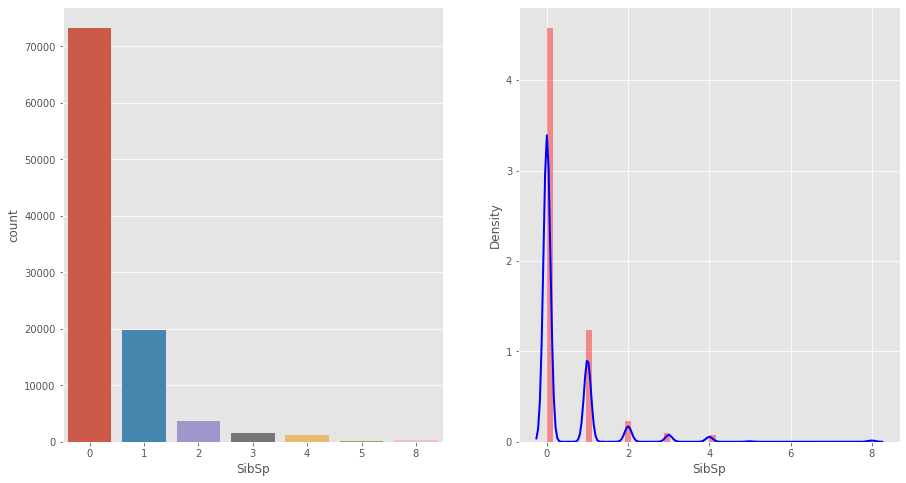

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax = sns.countplot(x="SibSp",data=train)
plt.subplot(1,2,2)
sns.distplot(train.loc[: ,"SibSp"], hist_kws={"color":"r"}, kde_kws={"color":"b", "lw":2})
plt.show()

**Sex**

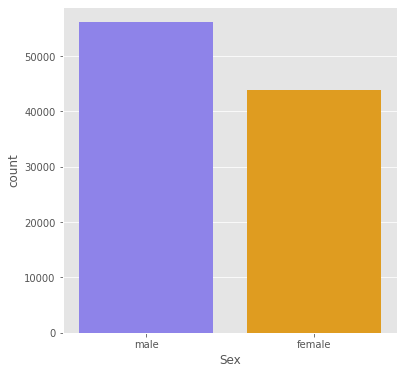

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.set_palette(["#8072fa","orange"])
ax = sns.countplot(x="Sex",data=train)
plt.show()

In [ ]:
print("The percentage of people who are male :",((train['Sex'] == "male").sum() / train.shape[0]) * 100)
print("The percentage of people who are female :",((train['Sex'] == "female").sum() / train.shape[0]) * 100)

The percentage of people who are male : 56.114
The percentage of people who are female : 43.885999999999996


**Embarked**

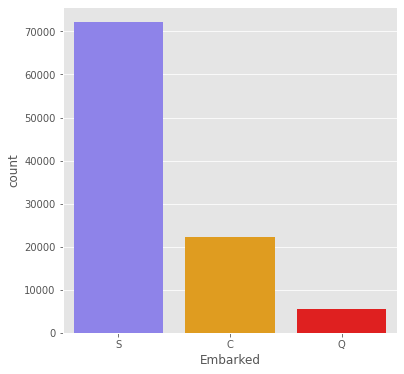

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.set_palette(["#8072fa","orange","Red"])
ax = sns.countplot(x="Embarked",data=train)
plt.show()

In [ ]:
print("The percentage of people embarked at S :",((train['Embarked'] == "S").sum() / train.shape[0]) * 100)
print("The percentage of people embarked at C :",((train['Embarked'] == "C").sum() / train.shape[0]) * 100)
print("The percentage of people embarked at Q :",((train['Embarked'] == "Q").sum() / train.shape[0]) * 100)

The percentage of people embarked at S : 72.139
The percentage of people embarked at C : 22.187
The percentage of people embarked at Q : 5.4239999999999995


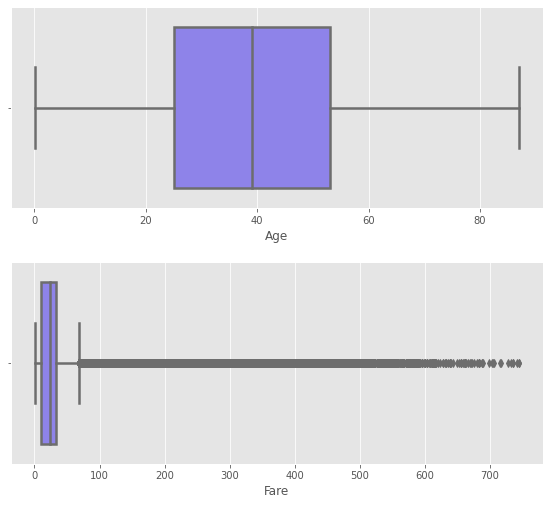

In [ ]:
fig = plt.figure(figsize=(8,14))
for index,col in enumerate(continuous_features):
    plt.subplot(4,1,index+1)
    sns.boxplot(train.loc[:, col], color="#8072fa",linewidth=2.5)
fig.tight_layout(pad = 2)

The Fare has a lot of outliers.

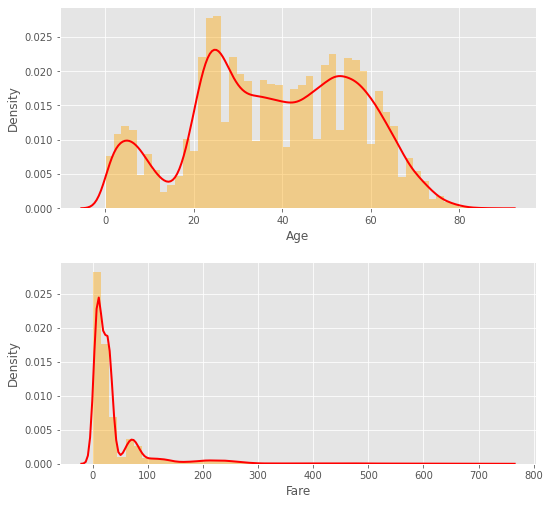

In [ ]:
fig = plt.figure(figsize=(8,14))
for index,col in enumerate(continuous_features):
    plt.subplot(4,1,index+1)
    sns.distplot(train.loc[:, col], color="orange", kde_kws={"color":"r", "lw":2})
fig.tight_layout(pad = 2)

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Bivariate Analysis</h2>

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [ ]:
cr = train.corr(method='pearson')
fig = px.imshow(cr)
fig.show()

In [ ]:
fig = px.histogram(data_frame=train,
                   x="Survived",
                   y=None,
                   color='Sex',
                   width=500,
                   template="plotly_dark",
                  color_discrete_map={"male":"#8072fa","female":"orange"})
fig.show()

Clearly, more females survived than males.

In [ ]:
fig = px.histogram(data_frame=train,
                   x="Embarked",
                   y=None,
                   color='Survived',
                   width=500,
                   template="plotly_dark",
                  color_discrete_map={1:"#8072fa",0:"orange"})
fig.show()

Most of the people who embarked at Southampton didn't survive. Most of the people who embarked at Cherbourg survived.

In [ ]:
fig = px.histogram(data_frame=train,
                   x="Pclass",
                   y=None,
                   color='Survived',
                   width=500,
                   template="plotly_dark",
                  color_discrete_map={0:"#8072fa",1:"orange"})
fig.show()

In [ ]:
fig = px.histogram(data_frame=train,
                   x="Parch",
                   y=None,
                   color='Survived',
                   width=500,
                   template="plotly_dark",
                  color_discrete_map={1:"#8072fa",0:"orange"})
fig.show()

In [ ]:
fig = px.histogram(data_frame=train,
                   x="SibSp",
                   y=None,
                   color='Survived',
                   width=500,
                   template="plotly_dark",
                  color_discrete_map={1:"#8072fa",0:"orange"})
fig.show()

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Data Preprocessing</h2>

**Conclusions from the EDA**
- There are NaNs value in
    1. Age
    2. Ticket
    3. Fare
    4. Cabin
    5. Embarked
- The people who survived and the people who didn't are almost equally distributed in train data.
- There are a lot of outliers in Fare feature since the distribution curve of Fare is highly right-skewed.
- The correlation graph doesn't show any significant correlation between features, so no dimensionality reduction can be performed. 
- Parch and SibSp represent the number of parents and siblings respectively. These can be added to form a feature of relatives.

> Handling missing data

In [ ]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(train['Age'].mean(),inplace=True)

train['Fare'].fillna(train['Fare'].mean(),inplace=True)
test['Fare'].fillna(train['Fare'].mean(),inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

Ticket number,Cabin & Name number doesn't seem to influence Survival. 

In [ ]:
train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)
test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

Applying a log function to reduce the influence of outliers in Fare column. Since there are a large number of outliers, removing them will lead to loss of a large numberof points.

In [ ]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

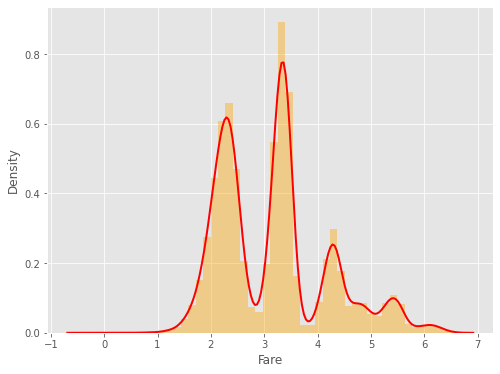

In [ ]:
plt.figure(figsize = (8,6))
sns.distplot(train.loc[:, 'Fare'],color='orange',kde_kws={"color":"r", "lw":2})
plt.show()

Adding Parch and SibSp into one feature

In [ ]:
train["relatives"] = train["Parch"] + train["SibSp"] + 1
test["relatives"] = test["Parch"] + test["SibSp"] + 1

In [ ]:
fig = px.histogram(data_frame=train,
                   x="relatives",
                   y=None,
                   color='Survived',
                   width=500,
                   template="plotly_dark",
                  color_discrete_map={1:"#8072fa",0:"orange"})
fig.show()

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Modeling</h2>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

Label Encoding the categorical features

In [ ]:
object_cols = ['Sex','Embarked']
for col in object_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(train[col])
    train[col] = label_encoder.transform(train[col])
    test[col] = label_encoder.transform(test[col])

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,1,1,1,38.355472,2,0,3.301009,2,3
1,0,3,1,38.355472,0,0,2.591516,2,1
2,0,3,1,0.330000,1,2,4.266756,2,4
3,0,3,1,19.000000,0,0,2.568022,2,1
4,1,3,1,25.000000,0,0,2.048982,2,1


In [ ]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives']
target = train['Survived'].values

> Logistic Regression model

In [ ]:
lr = LogisticRegression()
lr.fit(train[features], target)
print("Logistic Regression ROC AUC score:", roc_auc_score(target, lr.predict_proba(train[features])[:,1]))
print('Logistic Regression Accuracy score:', accuracy_score(target, lr.predict(train[features])))

Logistic Regression ROC AUC score: 0.8285372252746173
Logistic Regression Accuracy score: 0.7662


> Decision Tree model

In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train[features], target)
print('Decision Tree ROC AUC score:', roc_auc_score(target, dt.predict_proba(train[features])[:,1]))
print('Decision Tree Accuracy score:', accuracy_score(target, dt.predict(train[features])))

Decision Tree ROC AUC score: 0.9998952881858667
Decision Tree Accuracy score: 0.99295


Decision Tree is overfitting the data without tuning. So using Log Reg for final predictions.

<h2 style="font-size:35px; background-color:#8072fa; text-align:center; color:#fac472">Final Submission</h2>

In [ ]:
sample_submission['Survived'] = lr.predict(test[features])
sample_submission.to_csv('submission.csv',index=False)
sample_submission.head()

,PassengerId,Survived
0,100000,0
1,100001,0
2,100002,1
3,100003,0
4,100004,1
